In [1]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
from typing import Optional
import numpy as np
import os
from strawberryfields.backends.tfbackend.states import FockStateTF
from math import exp
from src.utils import von_neumann_entropy, renyi_entropy

2023-03-10 16:41:37.827068: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 16:41:38.055093: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-10 16:41:38.055123: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-10 16:41:47.762788: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import atan2, degrees
import copy
from cycler import cycler

golden_mean = (np.sqrt(5.0)-1.0)/2.0

subplotlabelfont = {#'family': 'Helvetica',
        'fontweight': 'bold',
        'fontsize': 9
        }

def format_axes(axes, position=(-.1, 1.02)):
    for i, ax in enumerate(axes, start=97):
        ax.text(*position, chr(i), fontdict=subplotlabelfont, weight='bold',
                transform=ax.transAxes)

def figsize(scale, aspect_ratio = golden_mean):
    fig_width_pt = 246.0                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch

    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*aspect_ratio              # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size

rcparams = {                      # setup matplotlib to use latex for output
    #"text.usetex": False,                # use LaTeX to write all text
    #"font.family": "sans-serif",
    #"font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    #"font.sans-serif": ["Helvetica"],
    #"font.monospace": [],
    "axes.labelsize": 12,               # LaTeX default is 10pt font.
    "axes.linewidth": 2,
    'lines.linewidth': 2,
    "xtick.major.width": 2,
    "ytick.major.width": 2,
    "lines.markersize":.05,
    "font.size": 9,
    "legend.fontsize": 10,               # Make the legend/label fonts a little smaller
    "axes.spines.top": False,
    "axes.spines.right": False,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": figsize(1),     # default fig size of 0.9 textwidth
#    "mathtext.fontset" : "custom",
#     "mathtext.rm" :  "Helvetica",
#     "mathtext.it" :  "Helvetica:italic",
#     "mathtext.bf" :  "Helvetica:bold",
#     "mathtext.sf" :  "Helvetica",
#     "mathtext.tt" :  "DejaVu Sans",
#     "mathtext.cal" : "DejaVu Sans:italic",
    }

mpl.rcParams.update(rcparams)

#Grad = ['#03fc28','#b503fc','#ff0000','#f5b942','#00ffaf','#FFAEBC','#B4F8C8','#C70039','#FFA500','#ffe800','#ff0078', '#00ffba','#1f52fe','#ff9600']
            
#mpl.rcParams['axes.prop_cycle'] =cycler(color=Grad)
dt=1e-3
steps=int(2e5)
x=np.array(list(range(0,steps)))*dt
a=1
a2=.4

plt.style.use(['seaborn-whitegrid'])#(['Solarize_Light2'])

In [3]:
dir = 'logs/2023.02.21.13.19.23'
res = np.load(os.path.join(dir, 'results.npy'))
starting_distance = 0

binding_energies = res[:, starting_distance:, -1, -1]
states = res[:, starting_distance:, :-1, :-1]
distances = np.load(os.path.join(dir, 'distance_array.npy'))[starting_distance:]
thetas = np.load(os.path.join(dir, 'angle_array.npy'))
quadrature_grid = np.load(os.path.join(dir, 'quadrature_array.npy'))

entropy_array = von_neumann_entropy(states=states)
renyi_entropy_array = renyi_entropy(states=states, n=2)

with open(os.path.join(dir, 'args.json')) as f:
    args = json.load(f)

startingDistance = [1, 2, 3, 5, 7, 8, 10, 12, 15, 18, 24, 22, 18, 17, 17, 16, 21, 25, 24] # starting at the first non-parallel angle

In [4]:
def entropy_fit(r):
    expr = (1354.1190287327627 + 69.57059464705372/r**6 - 589.0017867913149/r**5 + 2177.9948912201044/r**4 - 4485.60849646864/r**3 + 5528.745912907768/r**2 - 3988.1254971335707/r + 203.0086635377917*r - 420.62415056426846*r**2 + 192.6852057844995*r**3 - 45.45103486645947*r**4 + 5.6428967627556075*r**5 - 0.292282473955571*r**6)/(-1 + exp(3.340009074510866/r))
    
    return expr

def fit_morse_quality(r):
    return 0.7562780555949897/exp(7.90810731120047*r)

def interpolation_morse(r, angle_idx):
    r'''
    These are the Morse potential fit obtained in Mathematica
    '''
    
    if angle_idx == 1:
        expr = 5.580390309448237*(exp(-3.0377471897088193*(-0.528669782788294 + r)) - 2/exp(1.5188735948544096*(-0.528669782788294 + r)))
    elif angle_idx == 2:
        expr = 3.4274486627573997*(exp(-3.799380158605931*(-0.47973290114432926 + r)) - 2/exp(1.8996900793029654*(-0.47973290114432926 + r)))
    elif angle_idx == 3:
        expr = 2.285401169096024*(exp(-4.402463155249511*(-0.4631079255337017 + r)) - 2/exp(2.2012315776247555*(-0.4631079255337017 + r)))
    elif angle_idx == 4:
        expr = 1.551192171427588*(exp(-4.81570374860555*(-0.4642655447957261 + r)) - 2/exp(2.407851874302775*(-0.4642655447957261 + r)))
    elif angle_idx == 5:
        expr = 1.0598470742964785*(exp(-5.1410754088615755*(-0.4783898190284267 + r)) - 2/exp(2.5705377044307878*(-0.4783898190284267 + r)))
    elif angle_idx == 6:
        expr = 0.7148220809706628*(exp(-5.3904241278507286*(-0.5018955265663114 + r)) - 2/exp(2.6952120639253643*(-0.5018955265663114 + r)))
    elif angle_idx == 7:
        expr = 0.46331721539795195*(exp(-5.5069105743552305*(-0.5384565406606292 + r)) - 2/exp(2.7534552871776152*(-0.5384565406606292 + r)))
    elif angle_idx == 8:
        expr = 0.28495211368558043*(exp(-5.501660360933069*(-0.5868720195028256 + r)) - 2/exp(2.7508301804665347*(-0.5868720195028256 + r)))
    elif angle_idx == 9:
        expr = 0.16054553861792828*(exp(-5.406762370032314*(-0.6589019567964931 + r)) - 2/exp(2.703381185016157*(-0.6589019567964931 + r)))
    elif angle_idx == 10:
        expr = 0.0802423625900907*(exp(-5.2807411035440905*(-0.7610680973692473 + r)) - 2/exp(2.6403705517720453*(-0.7610680973692473 + r)))
    elif angle_idx == 11:
        expr = 0.031941895762222915*(exp(-4.8881023079372845*(-0.9318352120398004 + r)) - 2/exp(2.4440511539686423*(-0.9318352120398004 + r)))
    elif angle_idx == 12:
        expr = -0.21795992863678978*(exp(-18.93357243882598*(-0.419031099683263 + r)) - 2/exp(9.46678621941299*(-0.419031099683263 + r)))
    elif angle_idx == 13:
        expr = -4.596185038513766e8*(exp(-11.486738219445648*(3.3611808687392295 + r)) - 2/exp(5.743369109722824*(3.3611808687392295 + r)))
    elif angle_idx == 14:
        expr = -8.435877205314344e8*(exp(-9.835982910255005*(4.090374604186538 + r)) - 2/exp(4.917991455127503*(4.090374604186538 + r)))
    elif angle_idx == 15:
        expr = -5595.4996148289965*(-2*exp(3.473725867625206e-6*(199537.59265461436 + r)) + exp(6.947451735250412e-6*(199537.59265461436 + r)))
    elif angle_idx == 16:
        expr = -6257.5024012085705*(-2*exp(3.613860552846493e-6*(191800.01322388317 + r)) + exp(7.227721105692986e-6*(191800.01322388317 + r)))
    elif angle_idx == 17:
        expr = -78.2709544530638*(exp(-7.326961784623224*(1.1821855753944306 + r)) - 2/exp(3.663480892311612*(1.1821855753944306 + r)))
    elif angle_idx == 18:
        expr = -60.335480736907535*(exp(-6.655169258297058*(1.283760988719811 + r)) - 2/exp(3.327584629148529*(1.283760988719811 + r)))
    elif angle_idx == 19:
        expr = -59.1291656257202*(exp(-6.735608158749974*(1.248561482832166 + r)) - 2/exp(3.367804079374987*(1.248561482832166 + r)))
    return expr

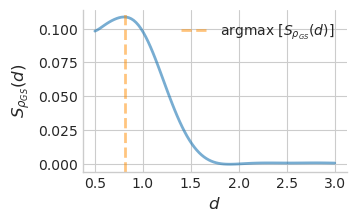

In [34]:
angle_idx = 7
start = startingDistance[angle_idx - 1] + 6

def plot_entropy(
    distance_array: np.ndarray,
    entropy_array: np.ndarray
) -> None:

    fig, axes = plt.subplots(nrows=1, ncols=1)
    #axes.scatter(distance_array[4:], binding_energy_array[4:], s=10)
    #axes.scatter(
    #    distance_array[start::3], 
    #    entropy_array[start::3],
    #    s=20, 
    #    c='darkblue', 
    #    marker='*',
    #    alpha=0.3
    #)
    line0, = axes.plot(
        np.linspace(0.5, 3.0, 100), 
        [entropy_fit(r) for r in np.linspace(0.5, 3.0, 100)], 
        alpha=0.6,
        #label=r'$S(\rho_{GS}(d))$',
        
        #linewidth=2
    )

    axes.set_xlabel(r'$d$')
    axes.set_ylabel(r'$S_{\rho_{GS}}(d)$')
    axes.grid(True)
    #axes.set_title('Entanglement entropy')

    line1 = axes.axvline(x=0.81758794, label=r'argmax $[S_{\rho_{GS}}(d)]$', linestyle = 'dashed', color = 'darkorange', alpha=0.5)
    axes.legend(handles=[line0, line1])
    
    plt.savefig('./plottini/Ent.pdf', dpi=300, transparent=False, bbox_inches='tight')

plot_entropy(
    distance_array=distances[start:],
    entropy_array=entropy_array[angle_idx, start:]
)

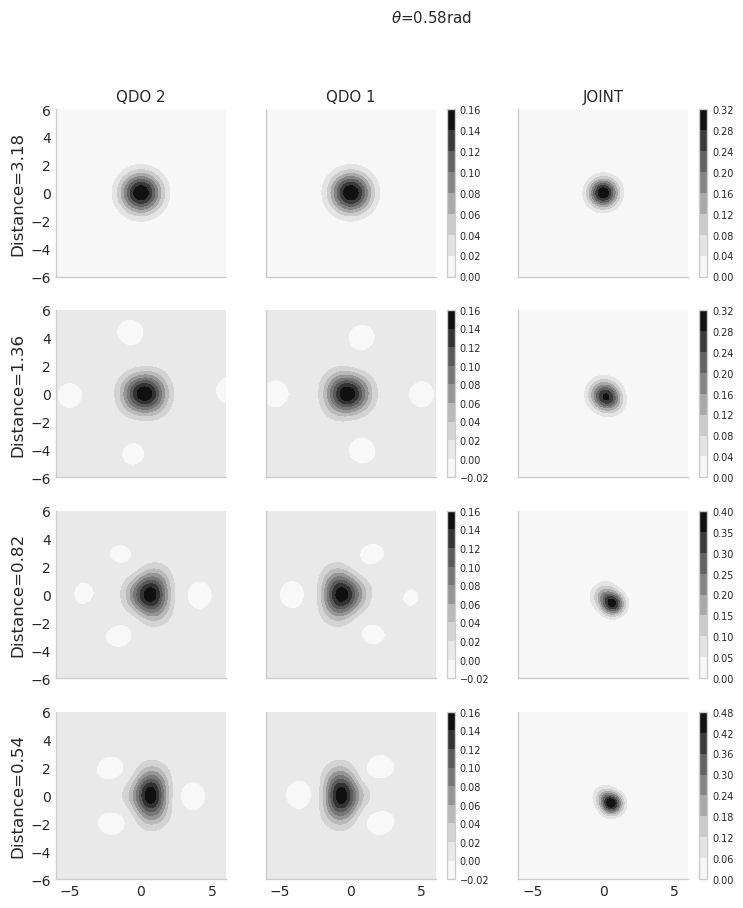

In [57]:
from src.utils import quadratures_density

def plot_wigner(
    fig_dir: Optional[str],
    quadrature_grid: np.ndarray,
    states: np.ndarray,
    cutoff_dim: int = 5
) -> None:

    X, P = np.meshgrid(quadrature_grid, quadrature_grid)
    
    X1, X2 = np.meshgrid(quadrature_grid, quadrature_grid)

    state0 = FockStateTF(state_data=states[7, 180], num_modes=2, pure=True, cutoff_dim=cutoff_dim)
    state1 = FockStateTF(state_data=states[7, 72], num_modes=2, pure=True, cutoff_dim=cutoff_dim)
    state2 = FockStateTF(state_data=states[7, 42], num_modes=2, pure=True, cutoff_dim=cutoff_dim)
    state3 = FockStateTF(state_data=states[7, 26], num_modes=2, pure=True, cutoff_dim=cutoff_dim)
    w_qdo1_0 = state0.wigner(mode=0, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo2_0 = state0.wigner(mode=1, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo1_1 = state1.wigner(mode=0, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo2_1 = state1.wigner(mode=1, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo1_2 = state2.wigner(mode=0, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo2_2 = state2.wigner(mode=1, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo1_3 = state3.wigner(mode=0, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo2_3 = state3.wigner(mode=1, xvec=quadrature_grid, pvec=quadrature_grid)
    
    joint_density0 = quadratures_density(
        x=quadrature_grid,
        alpha=states[7, 180],
        num_modes=2,
        cutoff=cutoff_dim
    )

    joint_density1 = quadratures_density(
        x=quadrature_grid,
        alpha=states[7, 72],
        num_modes=2,
        cutoff=cutoff_dim
    )

    joint_density2 = quadratures_density(
        x=quadrature_grid,
        alpha=states[7, 42],
        num_modes=2,
        cutoff=cutoff_dim
    )

    joint_density3 = quadratures_density(
        x=quadrature_grid,
        alpha=states[7, 26],
        num_modes=2,
        cutoff=cutoff_dim
    )

    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10), sharex=True, sharey=True, gridspec_kw={'width_ratios': [.8, 1, 1]})

    heatmap1_0 = axes[0, 0].contourf(X, P, w_qdo2_0)
    axes[0, 0].set_title("QDO 2")
    axes[0,0].set_ylabel('Y')
    # cbar = plt.colorbar(heatmap1_0, ax=axes[0,0])
    # cbar.ax.tick_params(labelsize=7)
    heatmap2_0 = axes[0, 1].contourf(X, P, w_qdo1_0)
    axes[0, 1].set_title("QDO 1")
    cbar = plt.colorbar(heatmap2_0, ax=axes[0,1])
    cbar.ax.tick_params(labelsize=7)
    heatmap3_0 = axes[0, 2].contourf(X1, X2, joint_density0)
    cbar = plt.colorbar(heatmap3_0, ax=axes[0,2])
    cbar.ax.tick_params(labelsize=7)
    axes[0, 2].set_title("JOINT")
    axes[0, 0].set_ylabel("Distance=3.18")

    heatmap1_1 = axes[1, 0].contourf(X, P, w_qdo2_1)
    axes[1,0].set_ylabel('Y')
    # cbar = plt.colorbar(heatmap1_1, ax=axes[1,0])
    # cbar.ax.tick_params(labelsize=7)
    heatmap2_1 = axes[1, 1].contourf(X, P, w_qdo1_1)
    cbar = plt.colorbar(heatmap2_1, ax=axes[1,1])
    cbar.ax.tick_params(labelsize=7)
    heatmap3_1 = axes[1, 2].contourf(X1, X2, joint_density1)
    cbar = plt.colorbar(heatmap3_1, ax=axes[1,2])
    cbar.ax.tick_params(labelsize=7)
    axes[1, 0].set_ylabel("Distance=1.36")

    heatmap1_2 = axes[2, 0].contourf(X, P, w_qdo2_2)
    axes[2,0].set_ylabel('Y')
    # cbar = plt.colorbar(heatmap1_2, ax=axes[2,0])
    # cbar.ax.tick_params(labelsize=7)
    heatmap2_2 = axes[2, 1].contourf(X, P, w_qdo1_2)
    cbar = plt.colorbar(heatmap2_2, ax=axes[2,1])
    cbar.ax.tick_params(labelsize=7)
    heatmap3_2 = axes[2, 2].contourf(X1, X2, joint_density2)
    cbar = plt.colorbar(heatmap3_2, ax=axes[2,2])
    cbar.ax.tick_params(labelsize=7)
    axes[2, 0].set_ylabel("Distance=0.82")

    heatmap1_3 = axes[3, 0].contourf(X, P, w_qdo2_3)
    axes[3,0].set_ylabel('Y')
    # cbar = plt.colorbar(heatmap1_3, ax=axes[3,0])
    # cbar.ax.tick_params(labelsize=7)
    heatmap2_3 = axes[3, 1].contourf(X, P, w_qdo1_3)
    cbar = plt.colorbar(heatmap2_3, ax=axes[3,1])
    cbar.ax.tick_params(labelsize=7)
    heatmap3_3 = axes[3, 2].contourf(X1, X2, joint_density3)
    cbar = plt.colorbar(heatmap3_3, ax=axes[3,2])
    cbar.ax.tick_params(labelsize=7)
    axes[3, 0].set_ylabel("Distance=0.54")

    fig.subplots_adjust(right=0.8)
    #cbar_ax = fig.add_axes([0.83, 0.15, 0.02, 0.7])
    

    # fig.text(0.5, 0.04, 'Position quadrature', ha='center', fontdict={'fontsize':20})
    # fig.text(0.04, 0.5, 'Momentum quadrature', va='center', rotation='vertical')

    plt.suptitle(r"$\theta$=0.58rad")
    plt.show()


plot_wigner(
    fig_dir=None,
    quadrature_grid=quadrature_grid,
    states=states,
    cutoff_dim=args['cutoff_dim']
)

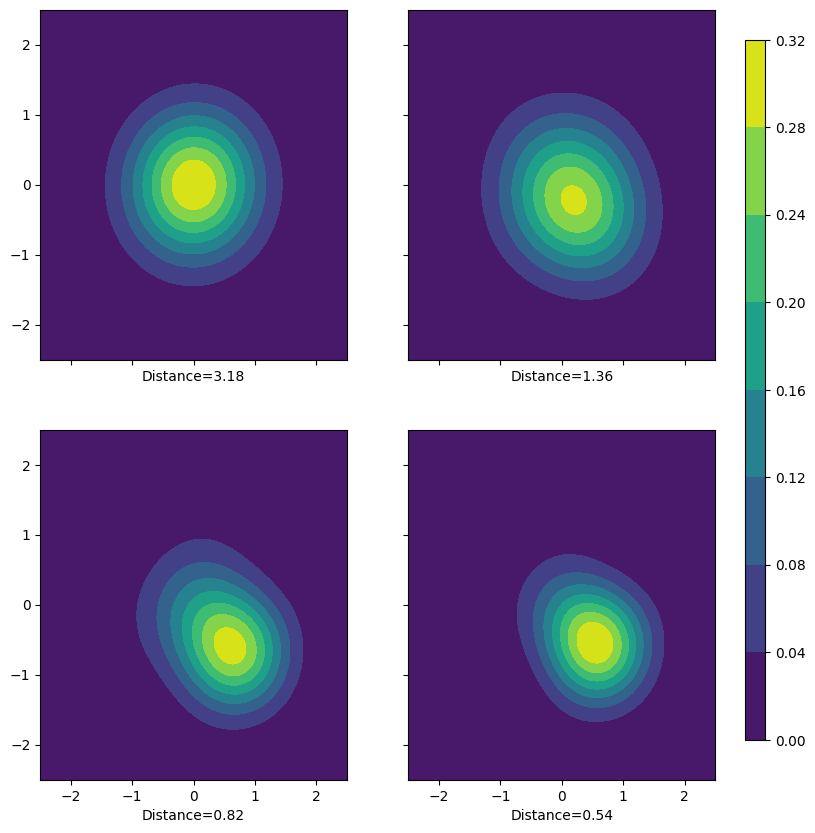

In [18]:
from src.utils import quadratures_density

def plot_joint_density(
    fig_dir: Optional[str],
    quadrature_grid: np.ndarray,
    states: np.ndarray,
    cutoff_dim: int = 5
) -> None:


    joint_density0 = quadratures_density(
        x=quadrature_grid,
        alpha=states[7, 180],
        num_modes=2,
        cutoff=cutoff_dim
    )

    joint_density1 = quadratures_density(
        x=quadrature_grid,
        alpha=states[7, 72],
        num_modes=2,
        cutoff=cutoff_dim
    )

    joint_density2 = quadratures_density(
        x=quadrature_grid,
        alpha=states[7, 42],
        num_modes=2,
        cutoff=cutoff_dim
    )

    joint_density3 = quadratures_density(
        x=quadrature_grid,
        alpha=states[7, 26],
        num_modes=2,
        cutoff=cutoff_dim
    )

    X1, X2 = np.meshgrid(quadrature_grid, quadrature_grid)

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)

    heatmap0 = axes[0, 0].contourf(X1, X2, joint_density0)
    heatmap1 = axes[0, 1].contourf(X1, X2, joint_density1)
    heatmap2 = axes[1, 0].contourf(X1, X2, joint_density2)
    heatmap3 = axes[1, 1].contourf(X1, X2, joint_density3)

    lim = 2.5
    axes[0, 0].set_xlim(-lim, lim)
    axes[0, 0].set_ylim(-lim, lim)
    axes[0, 1].set_xlim(-lim, lim)
    axes[0, 1].set_ylim(-lim, lim)
    axes[1, 0].set_xlim(-lim, lim)
    axes[1, 0].set_ylim(-lim, lim)
    axes[1, 1].set_xlim(-lim, lim)
    axes[1, 1].set_ylim(-lim, lim)

    axes[0, 0].set_xlabel("Distance=3.18")
    axes[0, 1].set_xlabel("Distance=1.36")
    axes[1, 0].set_xlabel("Distance=0.82")
    axes[1, 1].set_xlabel("Distance=0.54")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.83, 0.15, 0.02, 0.7])
    fig.colorbar(heatmap1, cax=cbar_ax)

    #plt.suptitle(r"$\theta$={:.2f} | Distance={:.2f}".format(thetas[7], distances[distance_idx]))

    #if fig_dir is not None:
    #    os.makedirs(fig_dir, exist_ok=True)
    #    plt.savefig(os.path.join(fig_dir, "angle={:.4f}_distance={:.4f}".format(thetas[7], distances[distance_idx]) + '.png'))
    #    plt.close()
    plt.show()

plot_joint_density(
    fig_dir=None,
    quadrature_grid=quadrature_grid,
    states=states,
    cutoff_dim=args['cutoff_dim']
)

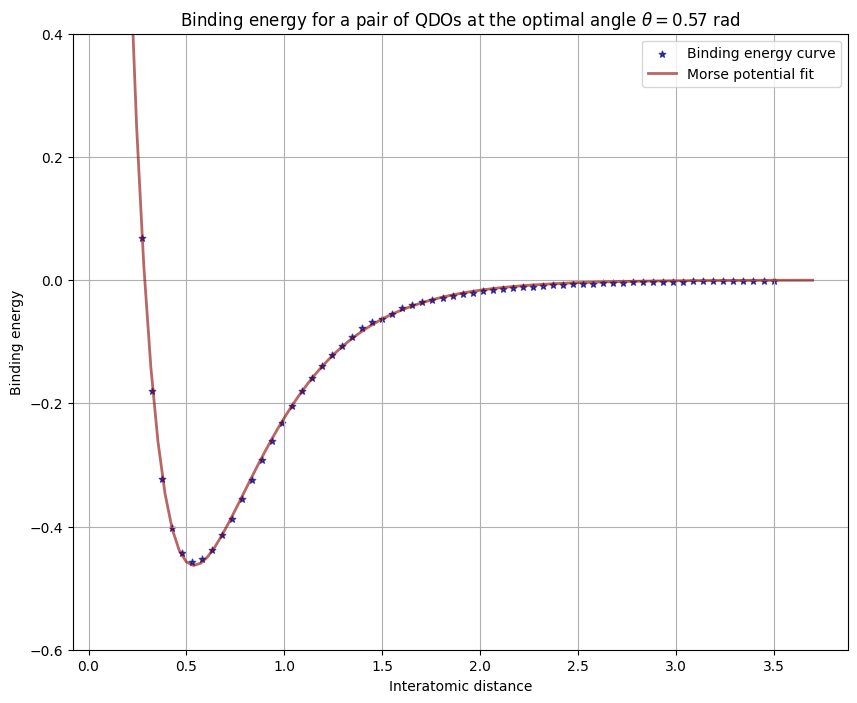

In [19]:
def plot_binding_curve_morse(
    distance_array: np.ndarray,
    binding_energy_array: np.ndarray,
    angle_idx: int,
    ymin: Optional[float]=None,
    ymax: Optional[float]=None
) -> None:

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

    line1, = axes.plot(
        np.linspace(0.1, 3.7, 100), 
        [interpolation_morse(r, angle_idx) for r in np.linspace(0.1, 3.7, 100)], 
        c='darkred',
        alpha=0.6,
        linewidth=2.0,
        label='Morse potential fit'
    )

    line0 = axes.scatter(
        distance_array[startingDistance[angle_idx-1]::3], 
        binding_energy_array[angle_idx, startingDistance[angle_idx-1]::3], 
        s=23, 
        c='darkblue', 
        marker='*',
        alpha=0.7,
        label='Binding energy curve'
    )
    
    axes.set_xlabel('Interatomic distance')
    axes.set_ylabel('Binding energy')
    if ymin is not None and ymax is not None:
        axes.set_ylim(ymin, ymax)
    axes.grid(True)
    axes.set_title(r'Binding energy for a pair of QDOs at the optimal angle $\theta=0.57$ rad')
    axes.legend(handles=[line0, line1])
    plt.show()
    #plt.savefig(save_path, dpi=300, transparent=False, bbox_inches='tight')

plot_binding_curve_morse(
    distance_array=distances,
    binding_energy_array=binding_energies,
    ymin=-0.6,
    ymax=0.4,
    angle_idx=7
)

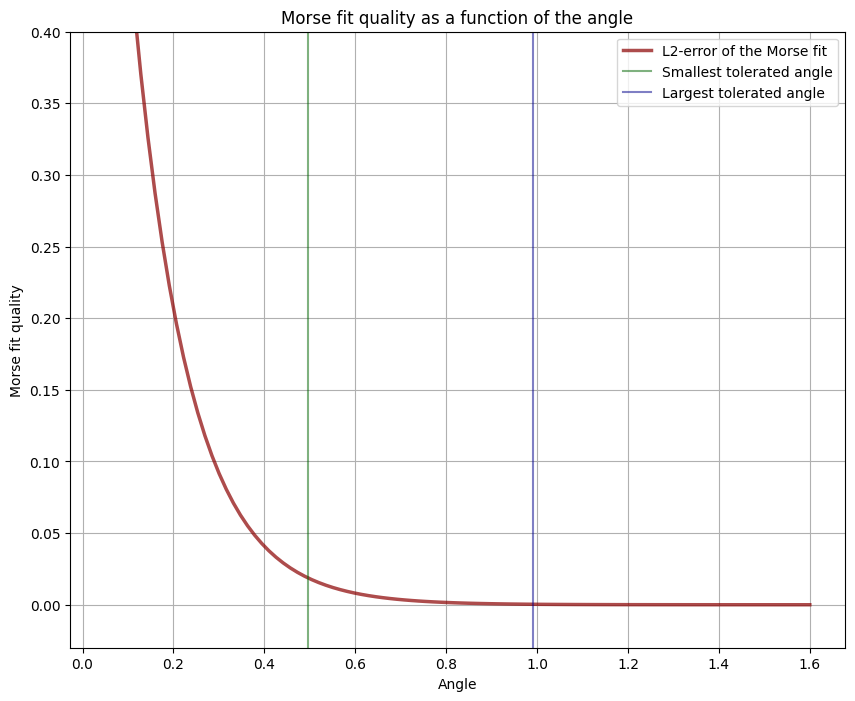

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

line0, = axes.plot(
    np.linspace(0.05, 1.6, 100), 
    [fit_morse_quality(r) for r in np.linspace(0.01, 1.6, 100)], 
    c='darkred',
    alpha=0.7,
    label='L2-error of the Morse fit',
    linewidth=2.5
)

line1 = axes.axvline(x=0.4960409453036515, label='Smallest tolerated angle', c='darkgreen', alpha=0.5)
line2 = axes.axvline(x=0.992081890607303, label='Largest tolerated angle', c='darkblue', alpha=0.5)

axes.legend(handles=[line0, line1, line2])

axes.set_xlabel('Angle')
axes.set_ylabel('Morse fit quality')
axes.set_ylim(-0.03, 0.4)
axes.grid(True)
axes.set_title('Morse fit quality as a function of the angle')
plt.show()
#plt.savefig(save_path, dpi=300, transparent=False, bbox_inches='tight')